In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn import tree
from sklearn import model_selection
import matplotlib.pyplot as plt

In [2]:
titanic_train = pd.read_csv("D:\\Data\\train.csv")
titanic_train.shape
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [3]:
titanic_test = pd.read_csv('D:\\Data\\test.csv')
titanic_test.shape
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [4]:
titanic_test.Survived = None

In [5]:
#Let's excercise by concatinating both train and test data
#Concatenation is Bcoz to have same number of rows and columns so that our job will be easy
titanic = pd.concat([titanic_train, titanic_test])
titanic.shape
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


C:\Users\Ashrumochan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
#Extract and create title column from name
def extract_title(name):
     return name.split(',')[1].split('.')[0].strip()
#The map(aFunction, aSequence) function applies a passed-in function to each item in an iterable object 
#and returns a list containing all the function call results.
titanic['Title'] = titanic['Name'].map(extract_title)

In [7]:
#Imputation work for missing data with default values
mean_imputer = preprocessing.Imputer() #By defalut parameter is mean and let it use default one.
mean_imputer.fit(titanic_train[['Age','Fare']]) 
#Age is missing in both train and test data.
#Fare is NOT missing in train data but missing test data. Since we are playing on tatanic union data, we are applying mean imputer on Fare as well..
titanic[['Age','Fare']] = mean_imputer.transform(titanic[['Age','Fare']])

In [8]:
#creaate categorical age column from age
#It's always a good practice to create functions so that the same can be applied on test data as well
def convert_age(age):
    if(age >= 0 and age <= 10): 
        return 'Child'
    elif(age <= 25): 
        return 'Young'
    elif(age <= 50): 
        return 'Middle'
    else: 
        return 'Old'
#Convert numerical Age column to categorical Age_Cat column
titanic['Age_Cat'] = titanic['Age'].map(convert_age)

In [9]:
#Create a new column FamilySize by combining SibSp and Parch and seee we get any additioanl pattern recognition than individual
titanic['FamilySize'] = titanic['SibSp'] +  titanic['Parch'] + 1
def convert_familysize(size):
    if(size == 1): 
        return 'Single'
    elif(size <=3): 
        return 'Small'
    elif(size <= 6): 
        return 'Medium'
    else: 
        return 'Large'
#Convert numerical FamilySize column to categorical FamilySize_Cat column
titanic['FamilySize_Cat'] = titanic['FamilySize'].map(convert_familysize)

In [10]:
#Now we got 3 new columns, Title, Age_Cat, FamilySize_Cat
#convert categorical columns to one-hot encoded columns including  newly created 3 categorical columns
#There is no other choice to convert categorical columns to get_dummies in Python
titanic1 = pd.get_dummies(titanic, columns=['Sex','Pclass','Embarked', 'Age_Cat', 'Title', 'FamilySize_Cat'])
titanic1.shape
titanic1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 44 columns):
Age                      1309 non-null float64
Cabin                    295 non-null object
Fare                     1309 non-null float64
Name                     1309 non-null object
Parch                    1309 non-null int64
PassengerId              1309 non-null int64
SibSp                    1309 non-null int64
Survived                 891 non-null float64
Ticket                   1309 non-null object
FamilySize               1309 non-null int64
Sex_female               1309 non-null uint8
Sex_male                 1309 non-null uint8
Pclass_1                 1309 non-null uint8
Pclass_2                 1309 non-null uint8
Pclass_3                 1309 non-null uint8
Embarked_C               1309 non-null uint8
Embarked_Q               1309 non-null uint8
Embarked_S               1309 non-null uint8
Age_Cat_Child            1309 non-null uint8
Age_Cat_Middle           1309 no

In [11]:
#Drop un-wanted columns for faster execution and create new set called titanic2
titanic2 = titanic1.drop(['PassengerId','Name','Age','Ticket','Cabin','Survived'], axis=1, inplace=False)
#See how may columns are there after 3 additional columns, one hot encoding and dropping
titanic2.shape 
titanic2.info()
#Splitting tain and test data
X_train = titanic2[0:titanic_train.shape[0]] #0 t0 891 records
X_train.shape
X_train.info()
y_train = titanic_train['Survived']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 38 columns):
Fare                     1309 non-null float64
Parch                    1309 non-null int64
SibSp                    1309 non-null int64
FamilySize               1309 non-null int64
Sex_female               1309 non-null uint8
Sex_male                 1309 non-null uint8
Pclass_1                 1309 non-null uint8
Pclass_2                 1309 non-null uint8
Pclass_3                 1309 non-null uint8
Embarked_C               1309 non-null uint8
Embarked_Q               1309 non-null uint8
Embarked_S               1309 non-null uint8
Age_Cat_Child            1309 non-null uint8
Age_Cat_Middle           1309 non-null uint8
Age_Cat_Old              1309 non-null uint8
Age_Cat_Young            1309 non-null uint8
Title_Capt               1309 non-null uint8
Title_Col                1309 non-null uint8
Title_Don                1309 non-null uint8
Title_Dona               1309 non-nul

In [12]:
#Let's build the model
#If we don't use random_state parameter, system can pick different values each time and we may get slight difference in accuracy each time you run.
tree_estimator = tree.DecisionTreeClassifier()
#Add parameters for tuning
#dt_grid = {'max_depth':[10, 11, 12], 'min_samples_split':[2,3,6,7,8], 'criterion':['gini','entropy']}
dt_grid = {'max_depth':list(range(10,15)), 'min_samples_split':list(range(2,8)), 'criterion':['gini','entropy']}

In [13]:
param_grid = model_selection.GridSearchCV(tree_estimator, dt_grid, cv=10) #Evolution of tee
param_grid.fit(X_train, y_train) #Building the tree
print(param_grid.best_score_) #Best score
print(param_grid.best_params_)
print(param_grid.score(X_train, y_train)) #Train score  #Evalution of tree

0.7968574635241302
{'criterion': 'entropy', 'max_depth': 11, 'min_samples_split': 4}
0.9102132435465768


In [26]:
#Exlore feature importances calculated by decision tree algorithm
#best_estimator_ gives final best parameters. 
#feature_importances_: Every feture has an importance with a priority number. Now we want to use best estimator along with very very importance features
#Let's create a DataFrame with fetures and their importances.
fi_df = pd.DataFrame({'feature':X_train.columns, 'importance':  param_grid.best_estimator_.feature_importances_}) #You may notice that feature	importance "Title_Mr" has more importance
print(fi_df.shape)
fi_df2 = fi_df[fi_df.importance!=0]
fi_df2 =fi_df2.sort_values('importance',ascending=False)

(38, 2)


In [27]:
fi_df2

,feature,importance
28,Title_Mr,0.325326
0,Fare,0.283382
3,FamilySize,0.091083
8,Pclass_3,0.084689
4,Sex_female,0.051641
24,Title_Master,0.025307
11,Embarked_S,0.022370
1,Parch,0.021846
13,Age_Cat_Middle,0.016944
14,Age_Cat_Old,0.016444


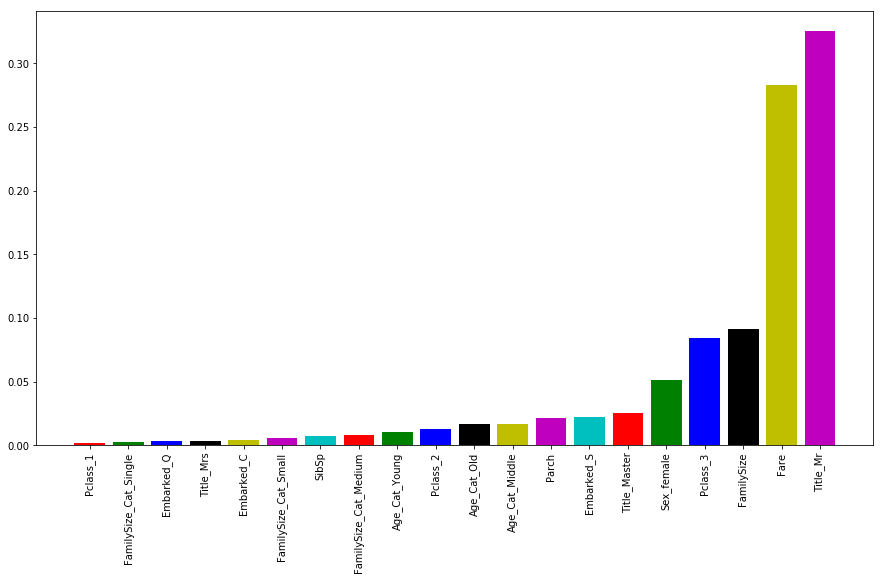

In [24]:
plt.figure(figsize=(15,8))
plt.bar(fi_df2["feature"],fi_df2["importance"],color="rgbkymc") 
plt.xticks(fi_df2["feature"],rotation='vertical')
plt.show()

In [15]:
import plotly.plotly as py
import plotly.graph_objs as go

In [16]:
data = [
    go.Bar(
        x=fi_df2['feature'], # assign x as the dataframe column 'x'
        y=fi_df2['importance']
    )
]

# IPython notebook
# py.iplot(data, filename='pandas-bar-chart')

py.plot(data, filename='pandas-bar-chart')

Aw, snap! We didn't get a username with your request.

Don't have an account? https://plot.ly/api_signup

Questions? accounts@plot.ly


''

In [17]:
#Now let's predict on test data
X_test = titanic2[titanic_train.shape[0]:] #shape[0]: means 0 index to n index. Not specifying end index is nothing but till nth index
X_test.shape
X_test.info()
titanic_test['Survived'] = param_grid.predict(X_test)

titanic_test.to_csv('submission_EDA_FE_FI.csv', columns=['PassengerId','Survived'],index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 38 columns):
Fare                     418 non-null float64
Parch                    418 non-null int64
SibSp                    418 non-null int64
FamilySize               418 non-null int64
Sex_female               418 non-null uint8
Sex_male                 418 non-null uint8
Pclass_1                 418 non-null uint8
Pclass_2                 418 non-null uint8
Pclass_3                 418 non-null uint8
Embarked_C               418 non-null uint8
Embarked_Q               418 non-null uint8
Embarked_S               418 non-null uint8
Age_Cat_Child            418 non-null uint8
Age_Cat_Middle           418 non-null uint8
Age_Cat_Old              418 non-null uint8
Age_Cat_Young            418 non-null uint8
Title_Capt               418 non-null uint8
Title_Col                418 non-null uint8
Title_Don                418 non-null uint8
Title_Dona               418 non-null uint8
Title_Dr     

In [18]:
from sklearn import ensemble

C:\Users\Ashrumochan\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning:

numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.



In [19]:
ensemble.BaggingClassifier

sklearn.ensemble.bagging.BaggingClassifier